# Neural network model from scratch

In this script, a neural network model from scratch is implemented. It consist of embdedding layer, a convolutional layer and a dense layer for the task of topic classification.

## Import Libraries

Import all necessary libraries for data handling, machine learning, and visualization.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras import Input, Model
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Load and Prepare Data

Load the data from a pickle file, which contains preprocessed text and binary labels for topics. Split the data into training and validation sets.

In [2]:
# Load the dataset
file_path = "main_dataset.pkl"
data = pd.read_pickle(file_path)

# Extract texts and corresponding binary topic labels
texts = data['text'].values
targets = data.loc[:, 'Academic_disciplines':'Universe'].values

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(texts, targets, test_size=0.2, random_state=42)

## Model Definition

Define the architecture of the neural network using TensorFlow and Keras. The model includes text vectorization, embedding, convolutional, and dense layers.

In [3]:
# Define model parameters
vocab_size = 20000
sequence_length = 200

# Text vectorization
vectorizer = TextVectorization(max_tokens=vocab_size, output_mode='int', output_sequence_length=sequence_length)
vectorizer.adapt(x_train)

# Build the neural network model
def build_model(vocab_size, embedding_dim, sequence_length):
    inputs = Input(shape=(sequence_length,), dtype=tf.int64)
    x = Embedding(input_dim=vocab_size + 1, output_dim=embedding_dim, input_length=sequence_length)(inputs)
    x = Conv1D(128, 5, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(targets.shape[1], activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

embedding_dim = 100
model = build_model(vocab_size, embedding_dim, sequence_length)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 100)       │     2,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │         2,535 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,075,019 (7.92 MB)

 Trainable params: 2,075,019 (7.92 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

Train the neural network on the training data and validate on the validation set to monitor performance.

In [4]:
x_train_vect = vectorizer(x_train)
x_val_vect = vectorizer(x_val)
history = model.fit(x_train_vect, y_train, epochs=10, batch_size=32, validation_data=(x_val_vect, y_val))

Epoch 1/10
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 187s 37ms/step - accuracy: 0.2538 - loss: 0.1511 - val_accuracy: 0.3461 - val_loss: 0.1000
Epoch 2/10
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 186s 37ms/step - accuracy: 0.3642 - loss: 0.0919 - val_accuracy: 0.3625 - val_loss: 0.0954
Epoch 3/10
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 186s 37ms/step - accuracy: 0.3878 - loss: 0.0778 - val_accuracy: 0.3798 - val_loss: 0.0969
Epoch 4/10
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 188s 38ms/step - accuracy: 0.4104 - loss: 0.0650 - val_accuracy: 0.3456 - val_loss: 0.1035
Epoch 5/10
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 184s 37ms/step - accuracy: 0.4267 - loss: 0.0526 - val_accuracy: 0.3655 - val_loss: 0.1137
Epoch 6/10
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 188s 38ms/step - accuracy: 0.4425 - loss: 0.0413 - val_accuracy: 0.3586 - val_loss: 0.1289
Epoch 7/10
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 188s 38ms/step - accuracy: 0.4525 - loss: 0.0327 - val_accuracy: 0.3536 - val_loss: 0.1487
Epoch 8/10
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 187s 37ms/step - accuracy: 

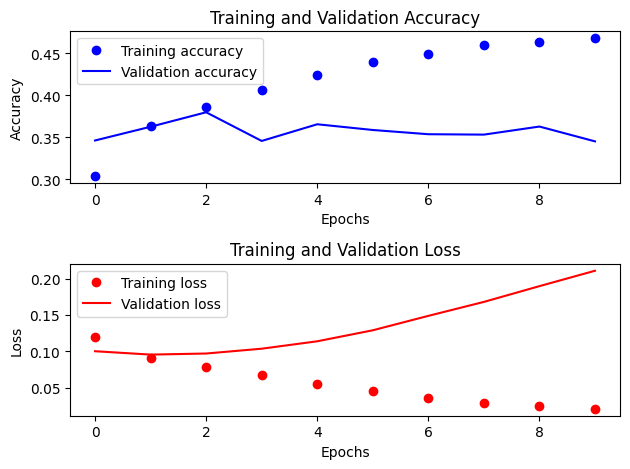

In [5]:
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], 'ro', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Prediction and Evaluation

Define functions for making predictions and visualizing them. Predictions are adjusted to classify only the top 3 most probable topics that also have a probability greater than 0.1. Evaluate the model using common multilabel classification metrics.

In [6]:
all_topics = [
    "Academic_disciplines", "Business", "Communication", "Concepts", "Culture",
    "Economy", "Education", "Energy", "Engineering", "Entities", "Entertainment",
    "Ethics", "Food_and_drink", "Geography", "Government", "Health", "History",
    "Human_behavior", "Humanities", "Information", "Internet", "Knowledge",
    "Language", "Law", "Life", "Mathematics", "Military", "Nature", "People",
    "Philosophy", "Politics", "Religion", "Science", "Society", "Sports",
    "Technology", "Time", "Universe", "Mass_media"
]

def predict_topics(text):
    text_vect = vectorizer([text])
    predicted = model.predict(text_vect)
    top_indices = np.argsort(predicted[0])[-3:]
    predicted_labels = np.zeros_like(predicted[0])
    for idx in top_indices:
        if predicted[0][idx] > 0.1:
            predicted_labels[idx] = 1
    return predicted_labels


# Evaluate the model
preds = []
for text in x_val[0:1000]:
    preds.append(predict_topics(text))
preds = np.array(preds)
print("Accuracy Score:", accuracy_score(y_val[0:1000], preds))
print("Precision Score:", precision_score(y_val[0:1000], preds, average='micro'))
print("Recall Score:", recall_score(y_val[0:1000], preds, average='micro'))
print("F1 Score:", f1_score(y_val[0:1000], preds, average='micro'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


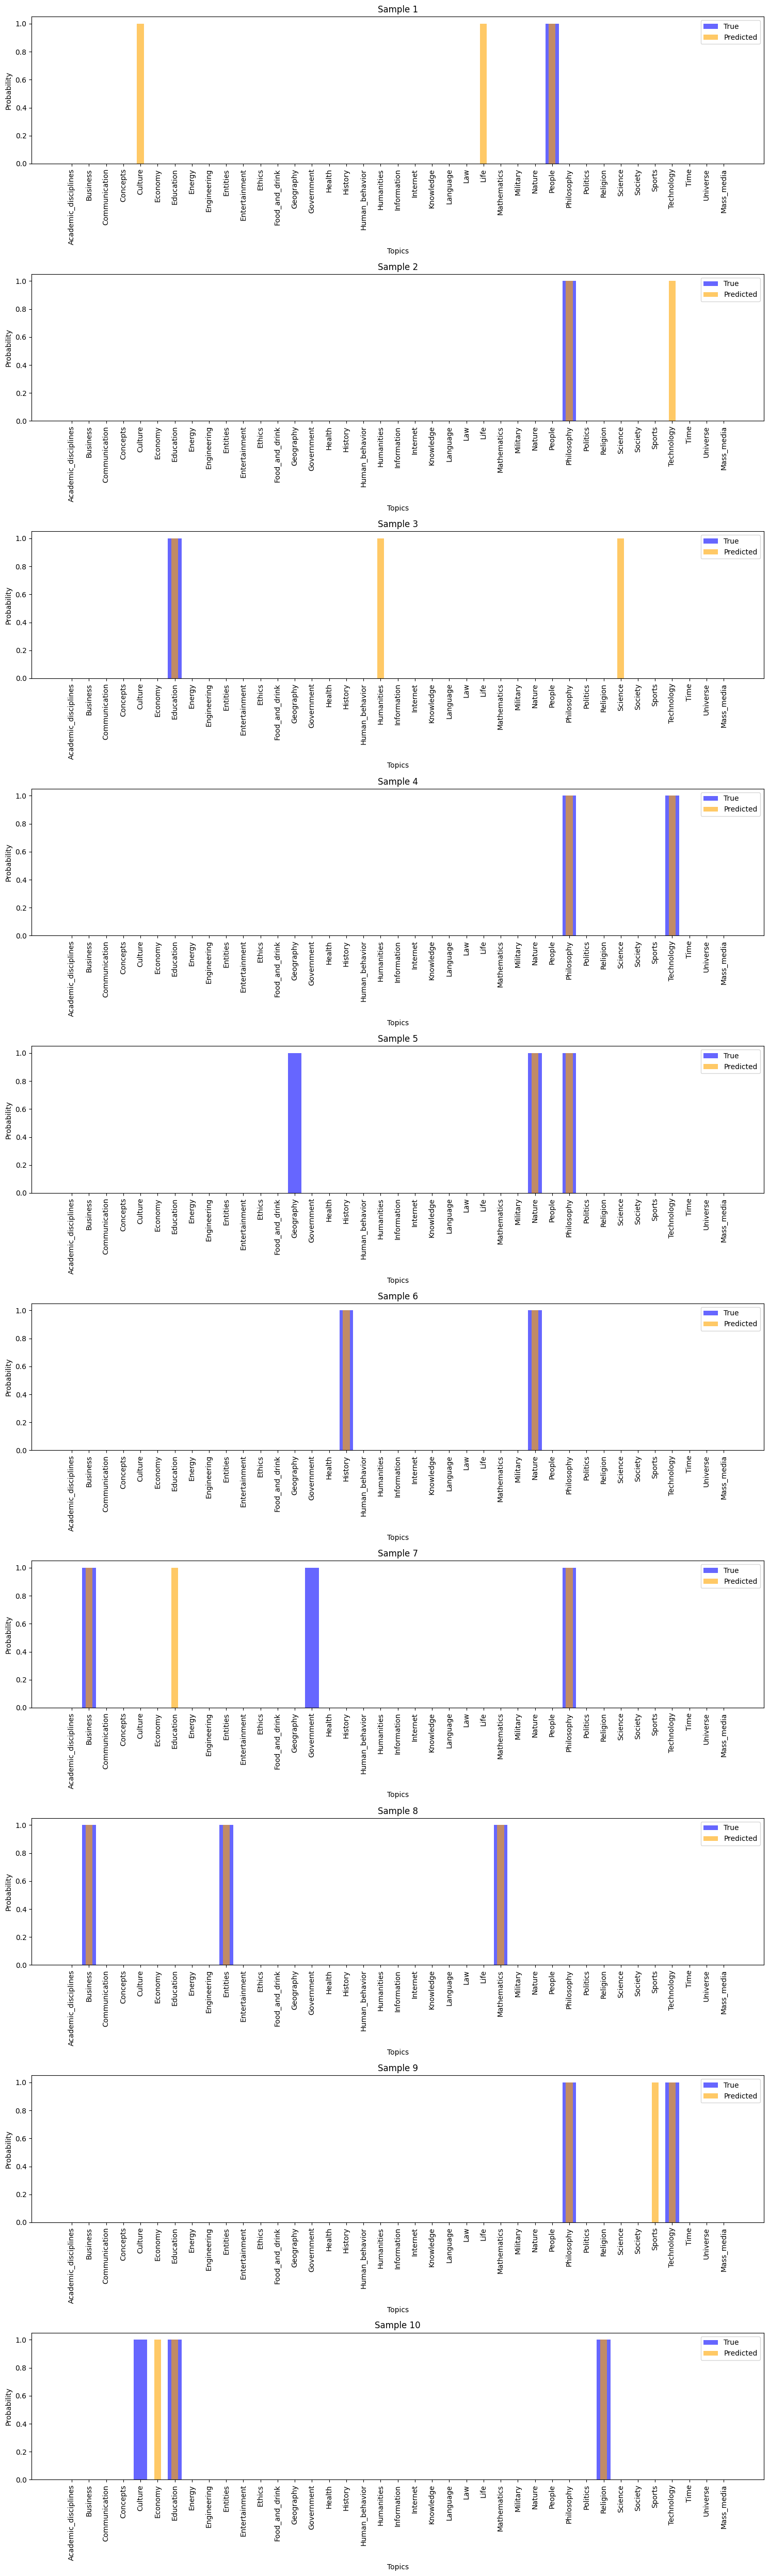

In [7]:
def visualize_predictions(num_samples=10):
    sample_indices = random.sample(range(len(x_val)), num_samples)
    fig, axes = plt.subplots(num_samples, 1, figsize=(15, 5 * num_samples))
    for i, idx in enumerate(sample_indices):
        sample_text = x_val[idx]
        true_probs = y_val[idx]
        pred_probs = predict_topics(sample_text)
        axes[i].bar(range(len(true_probs)), true_probs, alpha=0.6, label='True', color='blue')
        axes[i].bar(range(len(pred_probs)), pred_probs, alpha=0.6, label='Predicted', color='orange', width=0.4)
        axes[i].set_title(f"Sample {i+1}")
        axes[i].set_xlabel("Topics")
        axes[i].set_ylabel("Probability")
        axes[i].legend()
        axes[i].set_xticks(np.arange(len(true_probs)))
        axes[i].set_xticklabels(all_topics, rotation='vertical')
        plt.tight_layout()
    plt.show()

visualize_predictions()

In [11]:
def display_sample_predictions(num_samples=5):
    sample_indices = random.sample(range(len(x_val)), num_samples)
    for idx in sample_indices:
        sample_text = x_val[idx]
        true_labels = y_val[idx]
        pred_labels = predict_topics(x_val[idx])
        
        true_topics = [all_topics[i] for i in range(len(true_labels)) if true_labels[i] == 1]
        predicted_topics = [all_topics[i] for i in range(len(pred_labels)) if pred_labels[i] == 1]
        
        print(f"Sample Text: {sample_text}")
        print(f"True Labels: {true_topics}")
        print(f"Predicted Labels: {predicted_topics}")
        print("\n" + "-"*100 + "\n")

display_sample_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Sample Text:   Theodore Engel (1866&amp;ndash;January 8, 1935) was an American plumbing|plumber and Independent contractor|contractor from Milwaukee , Wisconsin who spent fourteen years as a Republican Party (United States)|Republican member of the Wisconsin State Assembly . Background Engel was born in Milwaukee County, Wisconsin|Milwaukee County in 1866, attended Grace Lutheran School and state school|public schools before dropping out to become a plumber. He pursued that trade for some years before becoming a general contractor . Public office Engel first ran for the Assembly's 15th Milwaukee County district (15th and 19th wards of the United States|Wards of the City of Milwaukee in 1914, as a Democratic Party (United States)|Democrat , coming in third with 1042 votes, behind Republican George Reinhardt 's 2180 votes and Socialist Party of America|Socialist Charles Towsley's 1143 votes. (Republican incumbent August Dietrich was not a candidate f